<a href="https://colab.research.google.com/github/minichan5/Detection/blob/master/Detect_faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Detección Frontal Rostros

Aqui se cargan todos los archivos que se necesiten.

En este primer ejemplo solo se está detectando la cara frontal, por lo tanto, conviene hacerlo usando clasificadores Haar feature-based. 

Para esto, se carga haarcascade_frontalface_default.xml para la detección de la cara frontal y la imagen que quiero detectar . 

In [3]:
from google.colab import files
file=files.upload()

Saving prueba_1.jpg to prueba_1.jpg


## Obtengo el modelo haarscascade para detectar caras frintales desde el Repositorio de Opencv

In [4]:
!wget https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml

--2019-11-28 15:55:47--  https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml [following]
--2019-11-28 15:55:52--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.02s   

2019-11-2

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Se lee la imagen cargada usando la función imread

aquí se utiliza el archivo haarscade_frontalface_default para detectar la cara.

Se convierte en escala de grises usando la función cvtColor antes de alimentarlo en detectMultiScale

In [6]:
!ls

haarcascade_frontalface_default.xml  prueba_1.jpg  sample_data


In [7]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv2.imread('prueba_1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print(faces)

[[283  96  29  29]
 [166 102  30  30]
 [237 106  26  26]
 [343 114  27  27]
 [449 126  26  26]
 [404 128  28  28]
 [772 136  26  26]
 [709 192  36  36]
 [504 205  30  30]
 [450 211  27  27]
 [386 211  29  29]
 [311 229  34  34]
 [246 233  29  29]
 [578 214  33  33]
 [783 231  36  36]
 [399 296  32  32]
 [582 296  33  33]
 [475 301  29  29]
 [294 289  36  36]
 [ 91 300  33  33]
 [169 303  40  40]]


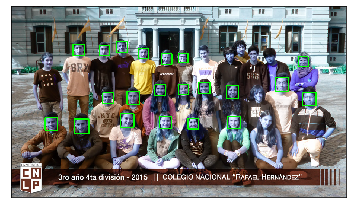

In [8]:
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    roigray = gray[y:y+h, x:x+w]
    roicolor = img[y:y+h, x:x+w]
plt.grid(None)   
plt.xticks([])
plt.yticks([])
imgplot = plt.imshow(img)

## Obtengo una imagen desde Internet

In [0]:
!wget http://topmanagement.com.mx/wp-content/uploads/2019/08/BANORTE-620x350.jpg

[[169  53  46  46]
 [381  67  49  49]
 [282  98  46  46]]


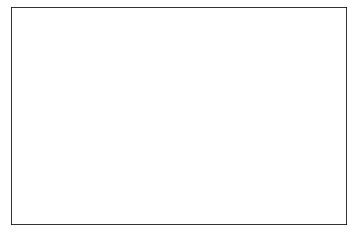

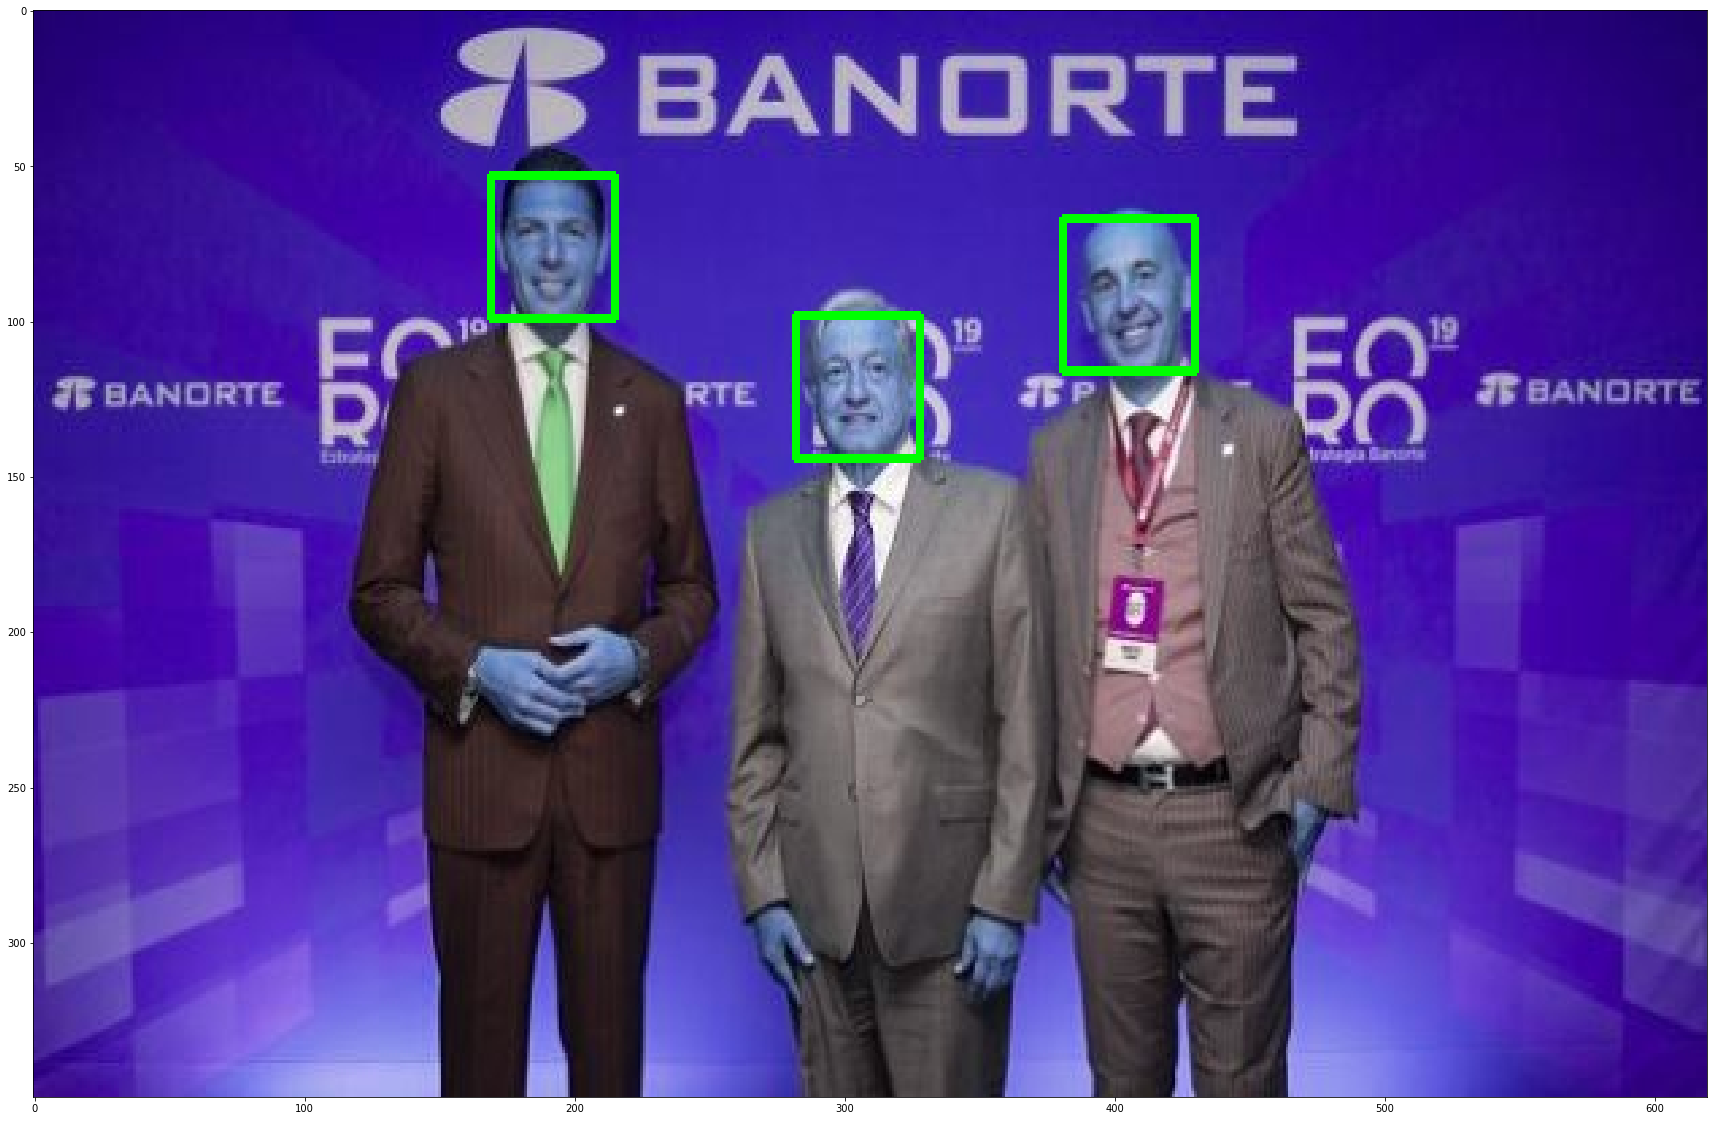

In [15]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv2.imread('NAME OF FILE.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print(faces)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    roigray = gray[y:y+h, x:x+w]
    roicolor = img[y:y+h, x:x+w]
plt.grid(None)   
plt.xticks([])
plt.yticks([])
#imgplot = plt.imshow(img)

fig, ax = plt.subplots(figsize=(30, 20))
imgplot =ax.imshow(img, interpolation='nearest', aspect='auto')

### Detección via MTCNN

En la red neuronal convolucional en cascada de tareas múltiples (MTCNN), la detección de rostros y la alineación de rostros se realizan conjuntamente, en una forma de entrenamiento de tareas múltiples. Esto permite que el modelo detecte mejor las caras que inicialmente no están alineadas.

In [16]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 9.8MB/s 
     |████████████████████████████████| 28.3MB 85kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 3.4.7.28
    Uninstalling opencv-python-3.4.7.28:
      Successfully uninstalled opencv-python-3.4.7.28


In [0]:
 %tensorflow_version 1.x

In [18]:
from mtcnn import MTCNN
import numpy as np
import cv2
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Descargamos una Imagen desde internet

In [19]:
!wget https://www.lanetanoticias.com/wp-content/uploads/2019/08/AMLO_Banorte_-1170x633.jpg

--2019-11-28 15:59:51--  https://www.lanetanoticias.com/wp-content/uploads/2019/08/AMLO_Banorte_-1170x633.jpg
Resolving www.lanetanoticias.com (www.lanetanoticias.com)... 104.26.11.216, 104.26.10.216, 2606:4700:20::681a:bd8, ...
Connecting to www.lanetanoticias.com (www.lanetanoticias.com)|104.26.11.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147265 (144K) [image/jpeg]
Saving to: ‘AMLO_Banorte_-1170x633.jpg’

AMLO_Banorte_-1170x 100%[===================>] 143.81K  --.-KB/s    in 0.008s  

2019-11-28 15:59:51 (18.4 MB/s) - ‘AMLO_Banorte_-1170x633.jpg’ saved [147265/147265]



## Renombramos el nombre del archivo

In [0]:
!mv AMLO_Banorte_-1170x633.jpg prueba_ban.jpeg

In [21]:
!ls

BANORTE-620x350.jpg    haarcascade_frontalface_default.xml  sample_data
BANORTE-620x350.jpg.1  prueba_1.jpg
BANORTE-620x350.jpg.2  prueba_ban.jpeg


In [22]:
img = cv2.cvtColor(cv2.imread("prueba_ban.jpeg"), cv2.COLOR_BGR2RGB)
detector = MTCNN()
result = detector.detect_faces(img)
image = img

for i in range (0,len(result)):

  bounding_box = result[i]['box']
  keypoints = result[i]['keypoints']

  cv2.rectangle(image,
                (bounding_box[0], bounding_box[1]),
                (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
                (0,155,255),
                2)

  cv2.circle(image,(keypoints['left_eye']), 2, (0,155,255), 2)
  cv2.circle(image,(keypoints['right_eye']), 2, (0,155,255), 2)
  cv2.circle(image,(keypoints['nose']), 2, (0,155,255), 2)
  cv2.circle(image,(keypoints['mouth_left']), 2, (0,155,255), 2)
  cv2.circle(image,(keypoints['mouth_right']), 2, (0,155,255), 2)

cv2.imwrite("img_drawn.jpg", cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

print(result)











[{'box': [833, 36, 103, 131], 'confidence': 0.9999605417251587, 'keypoints': {'left_eye': (858, 91), 'right_eye': (904, 82), 'nose': (886, 119), 'mouth_left': (866, 133), 'mouth_right': (915, 124)}}, {'box': [275, 53, 88, 138], 'confidence': 0.9998055100440979, 'keypoints': {'left_eye': (319, 105), 'right_eye': (354, 108), 'nose': (346, 136), 'mouth_left': (308, 150), 'mouth_right': (347, 152)}}, {'box': [574, 144, 91, 125], 'confidence': 0.9983134269714355, 'keypoints': {'left_eye': (598, 192), 'right_eye': (639, 195), 'nose': (617, 219), 'mouth_left': (597, 237), 'mouth_right': (633, 241)}}]


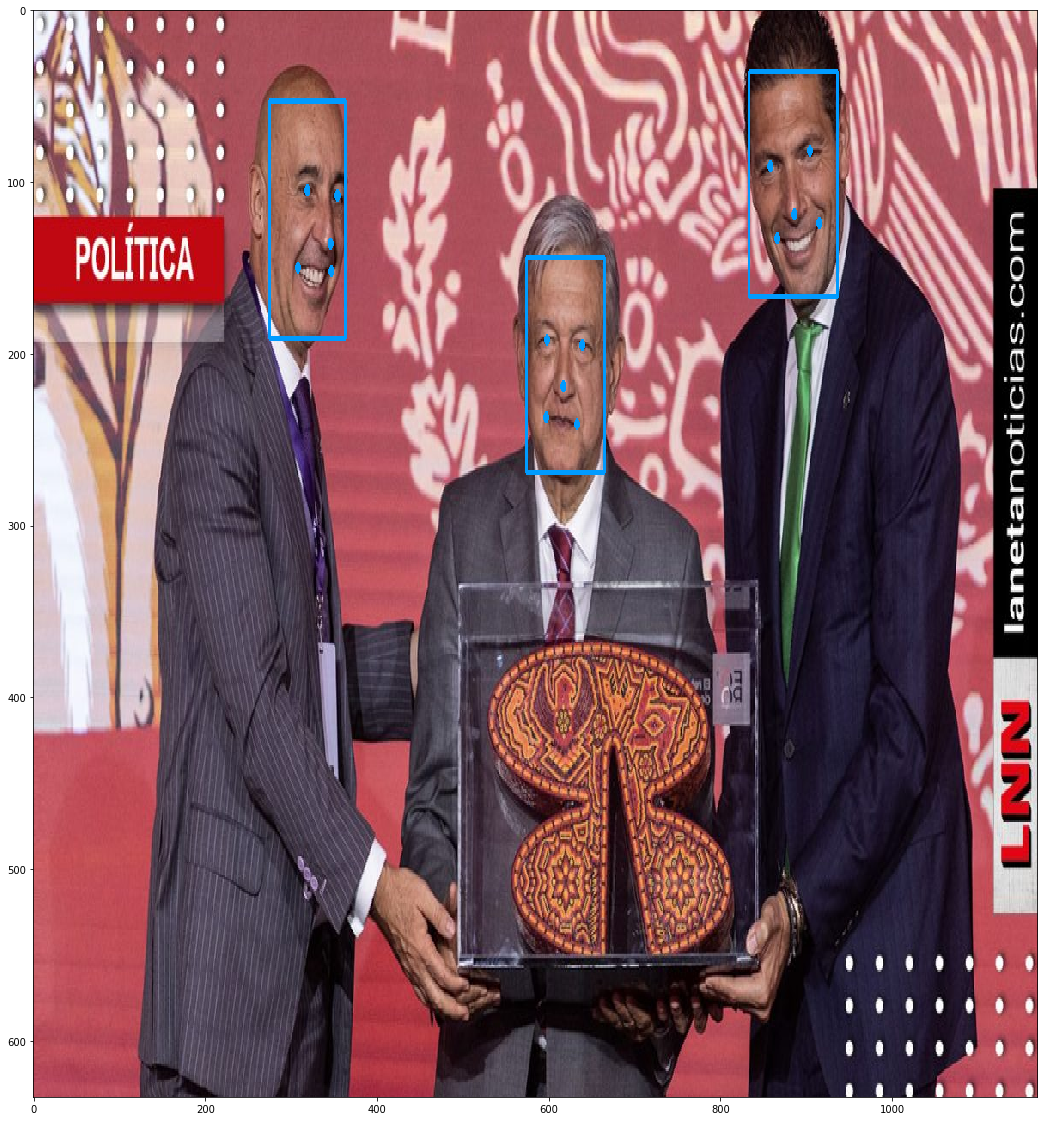

In [23]:
fig, ax = plt.subplots(figsize=(18, 20))
imgplot =ax.imshow(image, interpolation='nearest', aspect='auto')